# Ch 03: Concept 01

## Linear regression

텐서플로우를 import하자 

우리는 numpy가 필요하다. 또한 시각하를 하기 위해서 matplotlib이 필요하다.

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

몇 가지의 constant를 설정해두자. 이것은 hyper parameter라고 부른다.

In [2]:
learning_rate = 0.01
training_epochs = 100

이번 예제에서 잘 맞아 떨어지는 fit line을 만들기 위해서

가상의 데이터를 만든다.

In [3]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

In [4]:
x_train

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

In [5]:
y_train

array([-2.09553532, -2.41845222, -2.46666741, -2.16238776, -1.78135997,
       -1.7723289 , -1.71809844, -1.55410347, -1.67320268, -1.83813716,
       -1.65475291, -1.26835274, -1.61220992, -1.75410294, -1.18378864,
       -1.8039853 , -1.69507281, -1.31501149, -1.99266118, -1.19808756,
       -1.29645302, -0.70270522, -0.86949885, -0.71230408, -1.70407229,
       -0.83126897, -0.6223071 , -1.03623937, -0.92043885, -0.52821345,
       -0.82745863, -0.78569293, -1.18622934, -0.36981124, -0.58401785,
       -1.02541941, -0.48045372, -0.47302167, -0.54122891, -0.36040893,
        0.00685353, -0.2758562 , -0.40992376, -0.73871024, -0.74031672,
       -0.49370825,  0.29427047, -0.36552357,  0.11887497, -0.13706919,
       -0.04912542, -0.14754649,  0.54023925, -0.3417005 ,  0.05421015,
        0.19102989,  0.00408592,  0.13711097,  0.5074997 ,  0.39514197,
        0.72910127,  0.78963357,  0.41699824,  0.51732692,  0.60572805,
        0.74039549,  0.29514239,  0.57456703,  1.13207431,  1.13

위에서 생성한 데이터를 시각화 시키자.

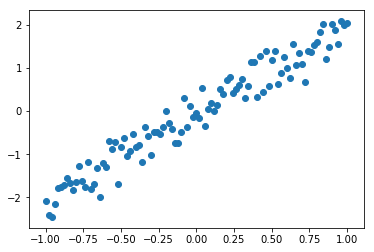

In [6]:
plt.scatter(x_train, y_train)

input, output node를 만들자. 

placeholder를 통해서 만든다. 이후에 placeholder에 x_train과 y_train이 input으로 들어갈 것이다.

In [7]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

model을 설정하자. 

y = w' * x

In [12]:
def model(X,w):
    return tf.multiply(X,w)

weight value (가중치 변수) 를 설정한다.

In [13]:
w = tf.Variable(0.0, name="weights")

cost function을 설정하자. 

여기서 cost function은 MSE 값이다.

In [14]:
y_model = model(X, w)
cost = tf.reduce_mean(tf.square(Y-y_model))

iteration이 돌아갈때마다 알고리즘을 학습시킬 operation을 설정하자.

역전파 경사하강법을 사용하고 cost는 위에서 만든 MSE값을 사용한다.

In [15]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

세션을 실행하기전 우선 모든 변수를 초기화 시켜야 한다.

In [16]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

각각의 (x,y)쌍을 여러번 학습시킨다. 

여기서 우리는 training epoch를 100으로 설정하였다.

즉 100번의 interation이 돌아가는 동안 해당 알고리즘을 학습시키는 것이다.

In [17]:
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

위에서 실행한 세션에 따라 변수는 학습이 되었다.

이를 또다른 변수에 저장해놓고 이후에 사용하도록 하자.

In [19]:
w_val = sess.run(w)

마찬가지로 세션이 끝났기 때문에 닫아주어야 한다.

In [20]:
sess.close()

우리가 이번에 만들어둔 fitting line을 시각화 시키도록 하자.

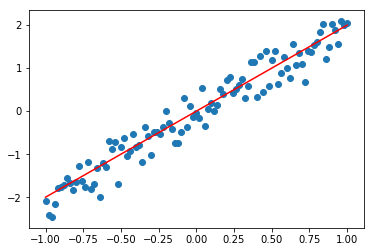

In [21]:
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()